In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
import copy as cp
sys.path.insert(0, '../model_tf2')
import parameters
import plotting_functions as pf
import data_utils as du
import model_utils as mu
import behaviour_analyses as ba

# ADD YOUR DIRECTORIES HERE

path = 'C:/Users/kdais/prog/generalising-structural-knowledge-shift-2d/Summaries/'
save_dirs = [path]

# Choose which training run data to load
date = '2024-03-24b'
run = '0'
index_load = None

# Try to find the most recent trained model data to run a forward pass
recent = -1
time_series_smoothing = 0
try:
    print("try")
    # Find model path and iteration index
    save_dir, index = pf.get_model_path(run, date, save_dirs, recent)
    print("index",index)
    # Run forward path for retrieved model, if folder doesn't exist yet
    model = ba.save_trained_outputs(date, run, int(index), base_path=save_dir, force_overwrite=False, n_envs_save=16)
except FileNotFoundError:
    print('No trained model weights found for ' + date + ', run ' + run + '.')
    
# Load data, generated either during training or in a forward pass through a trained model
data, para, list_of_files, save_path, env_dict = pf.get_data(save_dirs, run, date, recent, index=index, smoothing=time_series_smoothing, n_envs_save=16)

# Unpack data
x_all = data.x
g_all = data.g
g_pred2_all = data.g_pred2
p_all = data.p
acc_s_t_to = data.acc_to
acc_s_t_from = data.acc_from
positions = data.positions
adj = data.adj
x_timeseries = data.x_timeseries
x_gt_timeseries = data.x_gt_timeseries
p_timeseries = data.p_timeseries
g_timeseries = data.g_timeseries
pos_timeseries = data.pos_timeseries
final_variables = data.final_variables
# Group timeseries together for backward compatibility
timeseries = (g_timeseries, p_timeseries, pos_timeseries)
# Assign parameters
params, widths, n_states = para

# Specify plotting parameters. Some fields will be added after loading data & parameters
plot_specs = mu.DotDict({'smoothing': 0, # spatial ratemap smoothing. Needs to be odd, or 0 for no smoothing
                      'maxmin': True,
                      'cmap': 'jet',
                      'show': True,
                      'circle': True,
                      'g_max_0': False,
                      'p_max_0': True,
                      'save': False,
                      'split_freqs': True,
                      'mult': 4,
                      'cell_num': True,
                      'rectangle': {'marker_size': 20,
                                  'marker_shape': 's'},
                     })

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

masks, g_lim, p_lim = pf.sort_data(g_all, p_all, widths, plot_specs)

try
list_of_files ['checkpoint', 'tem_0.data-00000-of-00001', 'tem_0.index', 'tem_10656.data-00000-of-00001', 'tem_10656.index', 'tem_11322.data-00000-of-00001', 'tem_11322.index', 'tem_11988.data-00000-of-00001', 'tem_11988.index', 'tem_12654.data-00000-of-00001', 'tem_12654.index', 'tem_1332.data-00000-of-00001', 'tem_1332.index', 'tem_13320.data-00000-of-00001', 'tem_13320.index', 'tem_13986.data-00000-of-00001', 'tem_13986.index', 'tem_14652.data-00000-of-00001', 'tem_14652.index', 'tem_15318.data-00000-of-00001', 'tem_15318.index', 'tem_15984.data-00000-of-00001', 'tem_15984.index', 'tem_16650.data-00000-of-00001', 'tem_16650.index', 'tem_17316.data-00000-of-00001', 'tem_17316.index', 'tem_17982.data-00000-of-00001', 'tem_17982.index', 'tem_18648.data-00000-of-00001', 'tem_18648.index', 'tem_19314.data-00000-of-00001', 'tem_19314.index', 'tem_1998.data-00000-of-00001', 'tem_1998.index', 'tem_19980.data-00000-of-00001', 'tem_19980.index', 'tem_2664.data-00000-of-00001', 'tem_2664.i

C:\Users\kdais\Anaconda3\lib\site-packages\numpy\lib\type_check.py:498: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = _nx.array(x, subok=True, copy=copy)


In [2]:
masks = [(np.sum(g,1) + np.sum(p,1) != 0).tolist() for g,p in zip(g_all, p_all)]
trainalbe_variables = model.trainable_weights
print("trainalbe_variables",trainalbe_variables)

trainalbe_variables 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
for env in range(params.n_envs_save):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * n_states[env]
    print(env, '  Num_states : ', n_states[env], '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=0))

0   Num_states :  100    Approx proportion :  [1.]    Approx num :  [74.]
1   Num_states :  100    Approx proportion :  [1.]    Approx num :  [72.]
2   Num_states :  121    Approx proportion :  [1.]    Approx num :  [81.]
3   Num_states :  121    Approx proportion :  [1.]    Approx num :  [84.]
4   Num_states :  64    Approx proportion :  [1.]    Approx num :  [56.]
5   Num_states :  81    Approx proportion :  [1.]    Approx num :  [64.]
6   Num_states :  100    Approx proportion :  [1.]    Approx num :  [72.]
7   Num_states :  121    Approx proportion :  [1.]    Approx num :  [80.]
8   Num_states :  64    Approx proportion :  [1.]    Approx num :  [55.]
9   Num_states :  81    Approx proportion :  [1.]    Approx num :  [64.]
10   Num_states :  100    Approx proportion :  [1.]    Approx num :  [76.]
11   Num_states :  121    Approx proportion :  [1.]    Approx num :  [80.]
12   Num_states :  64    Approx proportion :  [1.]    Approx num :  [54.]
13   Num_states :  64    Approx proporti

In [4]:
env0 = 2 #2
env1 = 3
envs = [env0, env1]

## GRAPHS

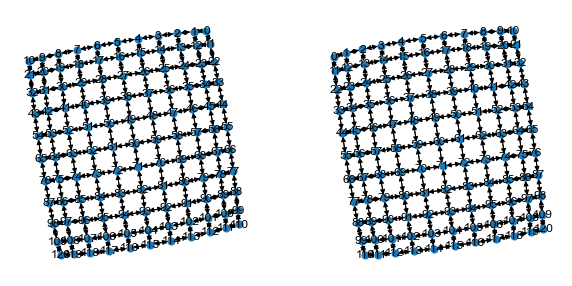

In [5]:
import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = pf.remove_zero_adj(adj[env])
        
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_,create_using=nx.DiGraph)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

## AGENT COVERAGE

## ACCURACY MAPS

## ENTORHINAL CELLS

In [6]:
plot_specs.split_freqs = True
plot_specs.n_cells_freq = params.n_grids_all
plot_specs.cmap = 'jet'
plot_specs.node_plot = True
plot_specs.max_min = False
print(g_all[0].shape)
print(plot_specs.n_cells_freq)

(100, 120)
[30, 30, 24, 18, 18]


cells (16,) env 2 cell (121, 120)
width 11
xs, ys (121,) (121,)
number of cells 120
n_cols 23 n_rows 12.0
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11


C:\Users\kdais\prog\generalising-structural-knowledge-shift-2d\tem_tf2\plotting_functions.py:60: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_rows, n_cols, grid + 1)


width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11


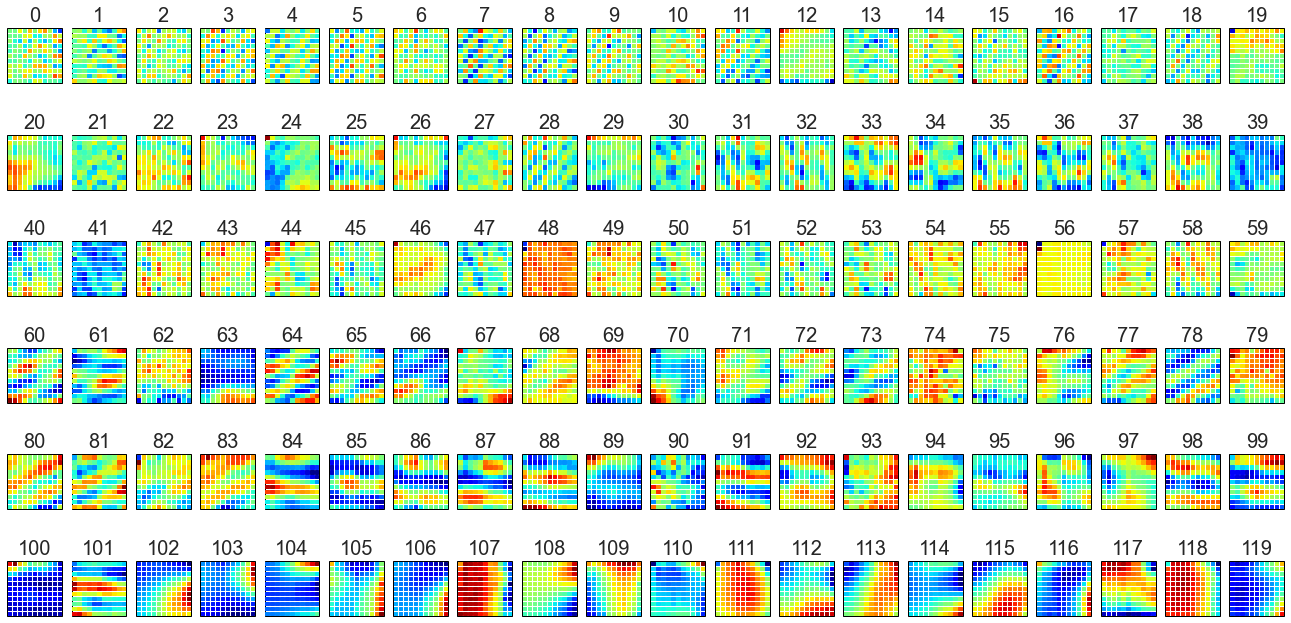

In [7]:
pf.square_plot(g_all, env0, params, plot_specs, name='g0', lims=g_lim, mask=masks[env0], env_class=env_dict.curric_env.envs[env0])

cells (16,) env 2 cell (121, 120)
width 11
xs, ys (121,) (121,)
number of cells 120
n_cols 23 n_rows 12.0
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
wid

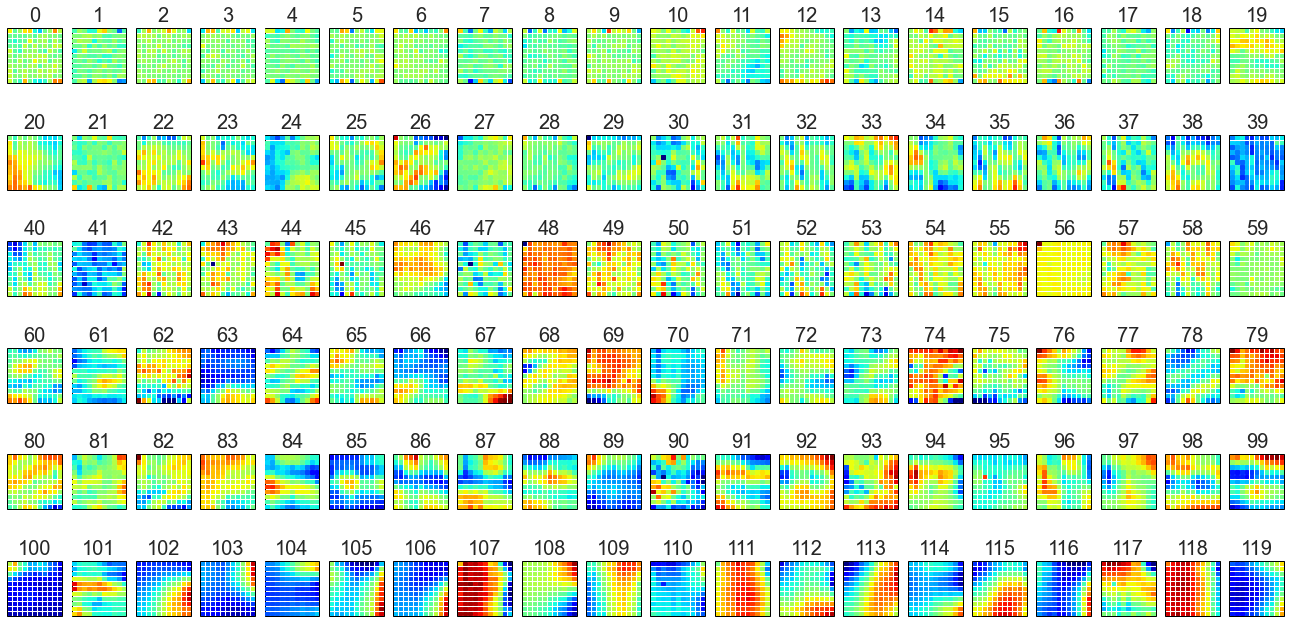

In [8]:
#pf.square_plot(g_all, env1, params, plot_specs, name='g1', lims=g_lim, mask=masks[env1], env_class=env_dict.curric_env.envs[env1])
pf.square_plot(g_pred2_all, env0, params, plot_specs, name='g0', lims=g_lim, mask=masks[env0], env_class=env_dict.curric_env.envs[env0])

In [9]:
print("final_variables",type(final_variables))
print("final_variables",dir(final_variables))
print("final_variables",len(final_variables.weights))
print("final_variables",final_variables.weights)

final_variables <class 'model_utils.DotDict'>
final_variables ['_DotDict__convert', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'to_dict', 'update', 'values']
final_variables 1
final_variables {'gamma': [<tf.Variable 'gamma_0:0' shape=() dtype=float32, numpy=-5.053295>, <tf.Variable 'gamma_1:0' shape=() dtype=float32, numpy=-0.38000566>, <tf.Variable 'gamma_2:0' shape=() dtype=float32, numpy=2.2818763>, <tf.Variable 'gamma_3:0' shape=() dtype=float32, numpy=5.802787>, <tf.Variable 'gamma_4:0' sh

In [10]:
print("final_variables",list(final_variables))

final_variables ['g', 'p', 'x_s', 'pred', 'logits', 'weights']
